# final.ipynb

## Purpose

This final will be split into two parts, a practical and a conceptual exam component.  The practical exam will be worth 50 points, and will primarily cover elements from Pandas on up.

## Data Set

We'll use a data set from "The Ramen Rater" (permission obtained), at https://www.theramenrater.com/

The overall goal of this final is to take a data set provided, pull the fields we're interested in, and present a conclusion based off the data.  Looking at the data, we have the following types of fields

| Field Name  | Description   |
|-------------|---------------|
| Review #    | Their ordering of review (their personal revier) |
| Brand       | The brand/maker name |
| Variety     | The type/flavor of ramen |
| Style       | Does it come in a packet, or a bowl |
| Country     | Country of release  |
| Stars       | The author's rating of the ramen |
| T           | Textual/notes Field  |

## Description of Problem

The goal of this final is to work at analyzing the data set provided, and coming up with some conclusions.  The grading will be the similar to that of previous notebooks, but there will be some extra weight on the conclusion and the types of questions being answered.  Furthermore, this is somewhat open ended.  Meaning, there's many ways you can approach this midterm, but there will be minimum requirements.

| Level     | Percentage of Points  | Sub Category  | Percentage of Percentage |
|------------|-----------------------|---------------|-------------------------|
| Minimum Effort | 70%               | Correctness   | 60%                     |
| <i></i>        | <i></i>               | Readability and Format | 30%            |
| <i></i>        | <i></i>            | Conclusion(s)   | 10%    |
| Above-Minimum  | 30%               | Correctness   | 60%                     |
| <i></i>        | <i></i>           | Readability and Format | 20%            |
| <i></i>        | <i></i>           | Conclusions/Questions  | 20%            |

### Minimum Effort Requirements

To get a minimum effort grade here (70% of maximum), the following criteria must be met:
1.  You can load the DataFrame given a CSV
2.  You can prepare the data in some fashion (can be excel, etc.) to get the format you need for analysis.
3.  2 graphs are produced to explain what you're seeing in data (see below)
4.  An analysis section where you describe your conclusion.


Please note what's allowed for external programs, and what isn't.  #2 specifically means you can use an external tool

### Above-Minimum Effort Requirements

To be classified in the "above-minimum" category, the following criteria must be met:
1.  You can load the DataFrame from the CSV provided below:
    - https://raw.githubusercontent.com/TheDarkTrumpet/BAIS-6040-0EXP-Sum2021/master/data/ramen-biglist.csv
2.  You can represent the data accurately, and clean up the data within the notebook (no outside changes from Excel or the like).  You should have the following data types from the loaded data frame, and show, in your notebook that it's of the proper type(s).

| Field   | Type  |
|---------|-------|
| Review # | Number |
| Brand    | String/object |
| Variety  | String/object |
| Style    | String/object |
| Country  | String/object |
| Stars    | float         |
| T        | Object        |

3.  At least 2 graphs are produced, but really think about the analysis you want to do.  One of these graphs should have some rollup that happens (e.g. an 'Other' category)
4.  You answer at least 2 questions about the data, and show supporting graphs for each.
5.  An analysis section where you describe your results.

Of importance here, in-case it wasn't clear above.  you **must** use Python for all the analysis in this.  Absolutely no Excel or any external tool.

### Questions that can be answered (not exhaustive)

Some questions you can attempt to answer with this data set include, but isn't exhaustive:

1.  How many reviews do we have per country?
2.  What style is most popular in a country?
3.  What style does a brand favor over another?
4.  What country has the best rated Ramen?

etc...

## Required Turn-In

One notebook is required for this assignment.  Please note that the standard conventions described thus far in the course will continue to be graded against.  That being, 70% of this will be off correctness (and analysis), and the other 30% will be off naming, conventions, and expandability.

Please be prepared to spend some time proof reading your notebook.  Please do not use this notebook as a template, create your own in the end.  While there are some "step by step" parts listed in this notebook, it's designed to give you the steps necessary for analysis.  The readability of your graphs matter here, too.

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

In [3]:
# Helper Functions Here
def outputCountryReport(ramenByCountry, countryColumn):
    f, ax = plt.subplots(figsize=(15, 10))
    f.patch.set_facecolor('white')
    sns.despine(f)

    plot = sns.histplot(
        ramenByCountry,
        x = countryColumn, hue="StarFloor",
        multiple="stack",
        palette="light:b",
        edgecolor=".3",
        linewidth=.5,
        legend=True
    )
    plt.xticks(rotation=90)
    plt.title('Reviews, by Country', fontsize=18)
    ax.tick_params(labelsize=14)
    ax.set_ylabel('Number of Reviews')
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('red')

In [4]:
rawRamenDataSet = pd.read_csv("https://raw.githubusercontent.com/TheDarkTrumpet/BAIS-6040-0EXP-Sum2021/master/data/ramen-biglist.csv")
rawRamenDataSet

,Review #,Brand,Variety,Style,Country,Stars,T
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5,NaN
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,NaN
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5,NaN
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NaN
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NaN
...,...,...,...,...,...,...,...
3697,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
3698,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
3699,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
3700,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [5]:
rawRamenDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  3702 non-null   int64  
 1   Brand     3702 non-null   object 
 2   Variety   3702 non-null   object 
 3   Style     3702 non-null   object 
 4   Country   3702 non-null   object 
 5   Stars     3702 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 202.6+ KB


In [6]:
ramenDataSet = rawRamenDataSet[["Brand", "Variety", "Style", "Country", "Stars"]].copy()
ramenDataSet["Stars"] = pd.to_numeric(ramenDataSet["Stars"],errors='coerce')
ramenDataSet

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [7]:
ramenDataSet.dropna(inplace=True)
ramenDataSet.reset_index(drop=True, inplace=True)
ramenDataSet

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3682,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3683,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3684,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3685,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [8]:
ramenDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brand    3687 non-null   object 
 1   Variety  3687 non-null   object 
 2   Style    3687 non-null   object 
 3   Country  3687 non-null   object 
 4   Stars    3687 non-null   float64
dtypes: float64(1), object(4)
memory usage: 144.1+ KB


In [9]:
ramenDataSet.groupby(["Brand", "Variety"])["Stars"].mean()

Brand              Variety                                                       
1 To 3 Noodles     Chatpat Masala                                                    4.00
7 Select           Nissin Instant Noodles Shrimp Ma Nao Lui Suan Flavour King Cup    3.75
                   Nissin Instant Noodles Tom Yum Seafood Creamy Flavour King Cup    3.50
7 Select/Nissin    Super Tom Yum Shrimp                                              3.50
7-Eleven / Nissin  Mouko Tanmen Nakamoto                                             4.25
                                                                                     ... 
iMee               Instant Noodles Vegetable Flavour                                 2.75
                   Instant Noodles chicken Flavour                                   3.50
iNoodle            Taiwan Style Chow Mein                                            2.25
                   Udon Noodle Soup Oriental                                         3.75
nunu              

In [10]:
ramenDataSet.groupby(["Country"])[["Stars"]].mean()

,Stars
Country,
Australia,3.260000
Bangladesh,3.479167
Brazil,3.645833
Cambodia,4.200000
Canada,2.330357
China,3.534898
Colombia,3.291667
Dubai,3.583333
Estonia,3.500000


ValueError: Could not interpret value `StarFloor` for parameter `hue`

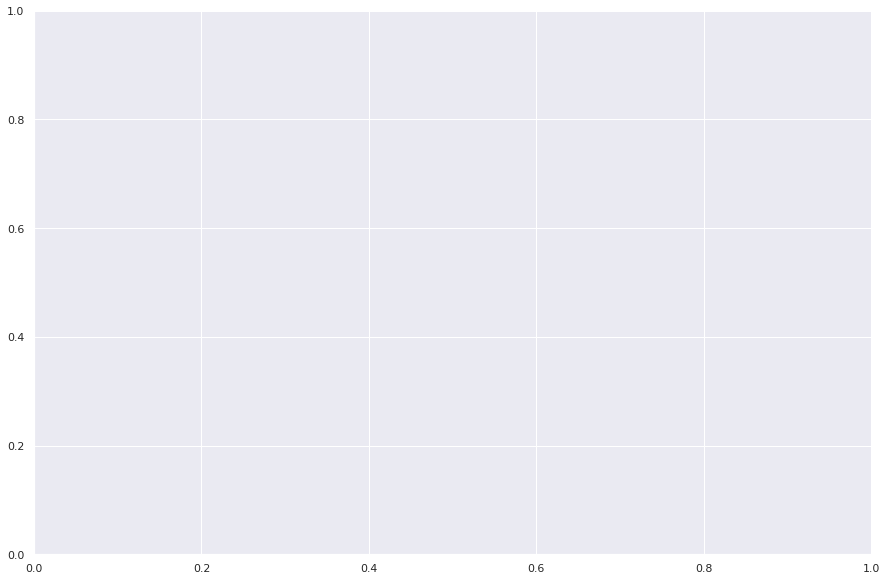

In [11]:
outputCountryReport(ramenDataSet, "Country")

In [ ]:
ramenDataSet['StarFloor'] = ramenDataSet.apply(lambda row: math.floor(row['Stars']), axis=1)
ramenDataSet

In [ ]:
ramenDataSet['CountryClassification'] = ramenDataSet.apply(
    lambda row: row["Country"] if len(ramenDataSet[ramenDataSet["Country"] == row["Country"]]) > 30 else "Other", axis=1)
ramenDataSet

In [ ]:
outputCountryReport(ramenDataSet, "CountryClassification")

